C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


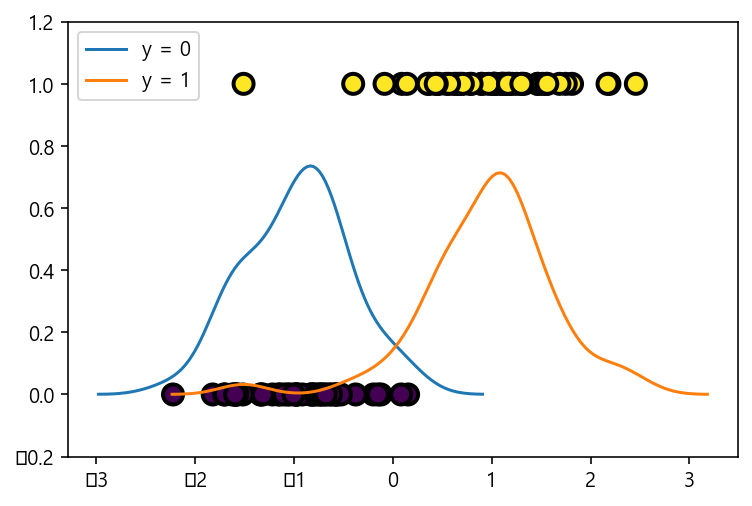

In [53]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [2]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0) #display 보여주지 않음
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.7679
Time:                        19:21:39   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


#### 연습 문제 1

1. 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?
2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.5368
Time:                        19:53:27   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [21]:
-27.8315/5.1403

-5.414372701982375

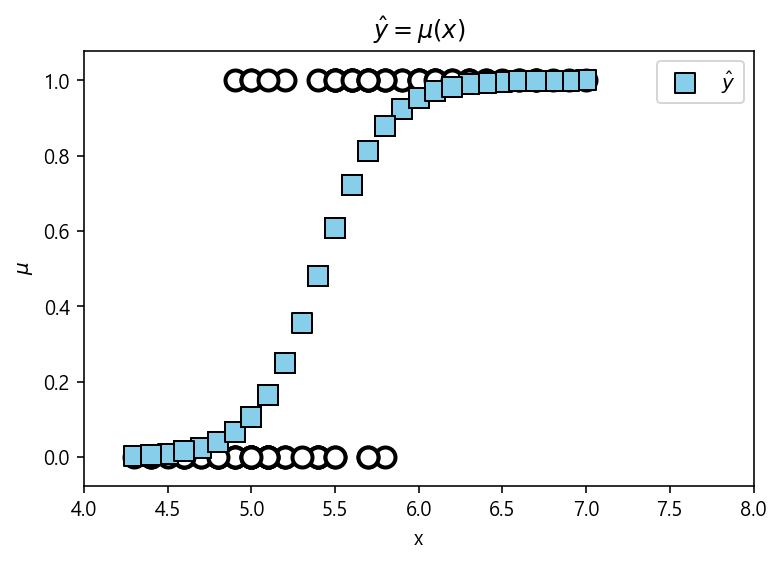

In [52]:
xx = np.linspace(-30, 30, 100)
mu = logit_res.predict(X)
#plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c="white", s=100, edgecolor="k",lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c="skyblue",
            s=100, edgecolor="k", lw=1)
plt.xlim(4, 8)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report

y_pred = logit_res.predict(X) >= 0.5

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02, 0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78,
        0.82, 0.9 , 0.92, 0.98, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52,
        0.58, 0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([ 9.15090198,  8.15090198,  7.12283475,  6.60880114,  6.09476752,
         5.58073391,  5.0667003 ,  4.55266668,  4.03863307,  3.01056584,
         2.49653223,  1.98249861,  1.468465  ,  0.95443139,  0.44039777,
        -0.07363584, -0.58766946, -1.10170307, -1.61573668, -2.1297703 ,
        -2.64380391, -3.15783753, -3.67187114, -4.18590475, -4.69993837,
        -5.21397198, -5.72800559]))

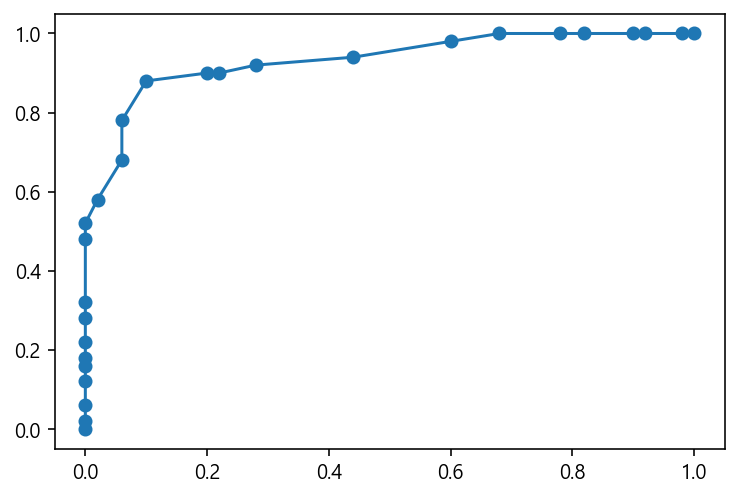

In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
# plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)

In [41]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

In [67]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [122]:
idx = np.in1d(iris.target, [1, 2])
X = pd.DataFrame(iris.data[idx, :])

# X.columns = ['sepal length', 'sepal width','petal length', 'petal width']
y = pd.DataFrame(iris.target[idx]) -1
df = pd.concat([y,X], axis=1)

df.columns=['species','sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width']

model_med = sm.Logit.from_formula("species ~ sepal_length + sepal_width + petal_length + petal_width", df)
result_med = model_med.fit()
print(result_med.summary())


Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.9142
Time:                        21:09:43   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [129]:
model_med = sm.Logit.from_formula("species ~ petal_length ", df)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.167160
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.7588
Time:                        21:14:17   Log-Likelihood:                -16.716
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.105e-24
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -43.7809     11.110     -3.941      0.000     -65.556     -22.006
petal_length     9.002

In [ ]:
9.0020 petal_length  가 43.7809보다 큰면 버지니카

In [136]:
from sklearn.metrics import roc_curve
idx = np.in1d(iris.target, [1, 2])
X = pd.DataFrame(iris.data[idx, :])

# X.columns = ['sepal length', 'sepal width','petal length', 'petal width']
y = pd.DataFrame(iris.target[idx]) -1
df = pd.concat([y,X], axis=1)

df.columns=['species','sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width']

model_med = sm.Logit.from_formula("species ~ sepal_length + sepal_width + petal_length + petal_width", df)
result_med = model_med.fit()
# print(result_med.summary())

fpr, tpr, thresholds = roc_curve(y, result_med.fittedvalues)
fpr, tpr, thresholds

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.08, 0.08, 1.  ]),
 array([0.  , 0.02, 0.62, 0.66, 0.92, 0.92, 0.98, 0.98, 1.  , 1.  ]),
 array([ 29.13056685,  28.13056685,   8.17633988,   7.85904849,
          2.0990656 ,   1.88016338,   0.70430911,  -1.23771599,
         -1.35610507, -23.50973831]))

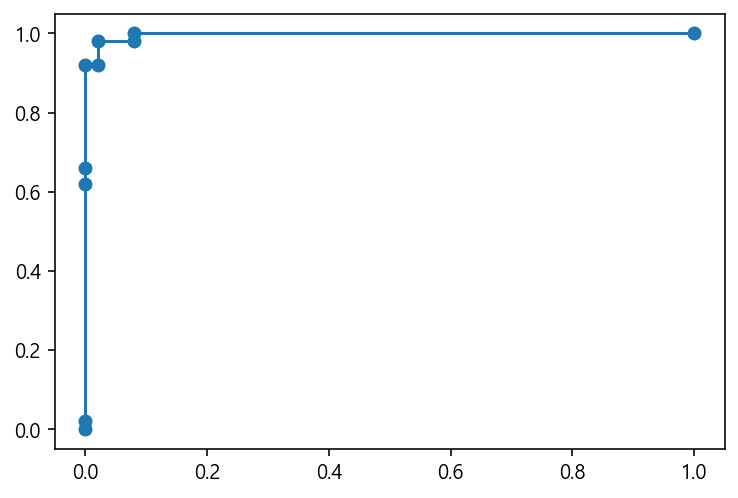

In [135]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
